In [1042]:
# –∏–º–ø–æ—Ä—Ç –±–∏–±–ª–∏–æ—Ç–µ–∫
import numpy as np
import pandas as pd 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
from sklearn import datasets
iris = datasets.load_iris()

## 4 –û—Ü–µ–Ω–∫–∞ —Ç–æ—á–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏, –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–µ, —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è
* –∑–∞–∫—Ä–µ–ø–∏—Ç—å –∑–Ω–∞–Ω–∏—è –æ –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–º —Å–º—ã—Å–ª–µ –º–µ—Ç—Ä–∏–∫ `TPR`, `FPR`.
* –ò–∑—É—á–∏—Ç—å –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ `ROC-–∫—Ä–∏–≤–æ–π`, –≥—Ä–∞—Ñ–∏–∫–∞ `Precision-Recall`.

### –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö –∏ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –≤ `DataFrame`

In [1043]:
df = pd.read_csv('../src/athletes.csv')

In [1044]:
df.head()

id            name nationality     sex       dob  height  weight  \
0  736041664  A Jesus Garcia         ESP    male  10/17/69    1.72    64.0   
1  532037425      A Lam Shin         KOR  female   9/23/86    1.68    56.0   
2  435962603     Aaron Brown         CAN    male   5/27/92    1.98    79.0   
3  521041435      Aaron Cook         MDA    male    1/2/91    1.83    80.0   
4   33922579      Aaron Gate         NZL    male  11/26/90    1.81    71.0   

       sport  gold  silver  bronze  
0  athletics     0       0       0  
1    fencing     0       0       0  
2  athletics     0       0       1  
3  taekwondo     0       0       0  
4    cycling     0       0       0

In [1045]:
print(f"{str(len(df[pd.isnull(df['height'])]))} - –î–ª—è `height` –ø—É—Å—Ç—ã—Ö —Å—Ç—Ä–æ–∫")
print(f"{str(len(df[pd.isnull(df['weight'])]))} - –î–ª—è `weight` –ø—É—Å—Ç—ã—Ö —Å—Ç—Ä–æ–∫ ")
print(f"{str(len(df[pd.isnull(df['sport'])]))} - –î–ª—è `sport` –ø—É—Å—Ç—ã—Ö —Å—Ç—Ä–æ–∫ ")
print(f"{str(len(df))} - –í—Å–µ–≥–æ —Å—Ç—Ä–æ–∫ –≤ –Ω–∞–±–æ—Ä–µ ")

330 - –î–ª—è `height` –ø—É—Å—Ç—ã—Ö —Å—Ç—Ä–æ–∫
659 - –î–ª—è `weight` –ø—É—Å—Ç—ã—Ö —Å—Ç—Ä–æ–∫ 
0 - –î–ª—è `sport` –ø—É—Å—Ç—ã—Ö —Å—Ç—Ä–æ–∫ 
11538 - –í—Å–µ–≥–æ —Å—Ç—Ä–æ–∫ –≤ –Ω–∞–±–æ—Ä–µ 


In [1046]:
df = df[pd.isnull(df['height']) == 0]
df = df[pd.isnull(df['weight']) == 0]

In [1047]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10858 non-null  int64  
 1   name         10858 non-null  object 
 2   nationality  10858 non-null  object 
 3   sex          10858 non-null  object 
 4   dob          10858 non-null  object 
 5   height       10858 non-null  float64
 6   weight       10858 non-null  float64
 7   sport        10858 non-null  object 
 8   gold         10858 non-null  int64  
 9   silver       10858 non-null  int64  
 10  bronze       10858 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB


### –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [1048]:
# —É–±–∏—Ä–∞–µ–º –¥–≤–∞ –ø–æ–ª—è –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ –≤–ª–∏—è—é—Ç –Ω–∞ –ø–æ–ª, –≤ —è–≤–Ω–æ–º –≤–∏–¥–µ –±–µ–∑ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–≥–æ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –∏ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é sex
features_columns = [c for c in df.columns if c not in ['id', 'name', 'dob', 'sex']]
print("–ü—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è –º–æ–¥–µ–ª–∏: ", features_columns)

–ü—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è –º–æ–¥–µ–ª–∏:  ['nationality', 'height', 'weight', 'sport', 'gold', 'silver', 'bronze']


In [1049]:
# –¥–∞–Ω–Ω—ã–π —Å–ø–æ—Å–æ–± –¥–∞–µ—Ç –±–æ–ª–µ–µ –≤—ã—Å–æ–∫–∏–π –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å score > 0.8
X = df[features_columns]
y = df['sex'].replace({'male':0, 'female':1})
X = pd.get_dummies(X, dtype=int)
X.describe().T

count       mean        std    min    25%    50%  \
height               10858.0   1.766942   0.113111   1.21   1.69   1.76   
weight               10858.0  72.070915  16.162358  31.00  60.00  70.00   
gold                 10858.0   0.059772   0.260756   0.00   0.00   0.00   
silver               10858.0   0.058482   0.242387   0.00   0.00   0.00   
bronze               10858.0   0.058574   0.239113   0.00   0.00   0.00   
...                      ...        ...        ...    ...    ...    ...   
sport_tennis         10858.0   0.017591   0.131464   0.00   0.00   0.00   
sport_triathlon      10858.0   0.010039   0.099694   0.00   0.00   0.00   
sport_volleyball     10858.0   0.035181   0.184247   0.00   0.00   0.00   
sport_weightlifting  10858.0   0.023761   0.152312   0.00   0.00   0.00   
sport_wrestling      10858.0   0.032142   0.176386   0.00   0.00   0.00   

                       75%     max  
height                1.84    2.21  
weight               81.00  170.00  
gold                  0.00    5.00  
silver                0.00    2.00  
bronze                0.00    2.00  
...                    ...     ...  
sport_tennis          0.00    1.00  
sport_triathlon       0.00    1.00  
sport_volleyball      0.00    1.00  
sport_weightlifting   0.00    1.00  
sport_wrestling       0.00    1.00  

[232 rows x 8 columns]

### –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ `LogisticRegression` train `80` / `20`

In [1050]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [1051]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [1052]:
model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [1053]:
predictions = model.predict_proba(X_test)

In [1054]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.8442320976283675, 0.8397790055248618)

### –û—Ü–µ–Ω–∫–∞ —Ç–æ—á–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏

#### –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ `ROC`-–∫—Ä–∏–≤–æ–π —Å –ø–æ–º–æ—â—å—é —Ñ—É–Ω–∫—Ü–∏–∏ `sklearn.metrics.roc_curve`

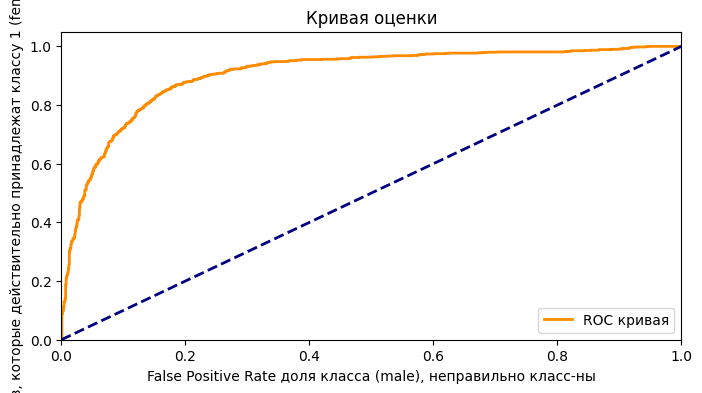

In [1055]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π –¥–ª—è –∫–ª–∞—Å—Å–∞ 1 (–ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–π –∫–ª–∞—Å—Å = female)
y_prob = model.predict_proba(X_test)[:, 1]

# –í—ã—á–∏—Å–ª–µ–Ω–∏–µ ROC-–∫—Ä–∏–≤–æ–π
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

#–ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ ROC-–∫—Ä–∏–≤–æ–π
plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC –∫—Ä–∏–≤–∞—è')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate –¥–æ–ª—è –∫–ª–∞—Å—Å–∞ (male), –Ω–µ–ø—Ä–∞–≤–∏–ª—å–Ω–æ –∫–ª–∞—Å—Å-–Ω—ã')
plt.ylabel('TP (True Positives) - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä–µ–∫—Ç–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–∞—Ç –∫–ª–∞—Å—Å—É 1 (female) –∏ –±—ã–ª–∏ –ø—Ä–∞–≤–∏–ª—å–Ω–æ –∫–ª–∞—Å—Å-–Ω—ã –º–æ–¥–µ–ª—å—é')
plt.title('–ö—Ä–∏–≤–∞—è –æ—Ü–µ–Ω–∫–∏')
plt.legend(loc='lower right')
plt.show()

#### –í—ã—á–∏—Å–ª–µ–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏–µ `ROC-AUC` –º–µ—Ç—Ä–∏–∫–∏ —Å –ø–æ–º–æ—â—å—é —Ñ—É–Ω–∫—Ü–∏–∏ `sklearn.metrics.roc_auc_score`

In [1056]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC-AUC: {roc_auc:.2f}')

ROC-AUC: 0.90


#### –†—É—á–Ω–æ–π –ø–æ–¥—Å—á–µ—Ç –º–µ—Ç—Ä–∏–∫ `TPR`, `FPR`, –±–µ–∑ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –≥–æ—Ç–æ–≤—ã—Ö —Ñ—É–Ω–∫—Ü–∏–π –∏–∑ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ `sklearn`

In [1057]:
# —Å–±—Ä–æ—Å –∏–Ω–¥–µ–∫—Å–æ–≤ –¥–ª—è —Ä–∞—Å—á–µ—Ç–∞
y_scores = model.predict_proba(X_test)[:, 1]
y_true = pd.Series(y_test).reset_index(drop=True)

In [1058]:
def calculate_tpr_fpr(y_true, y_prob, threshold=0.5, target_name=""):
    """
    –§—É–Ω–∫—Ü–∏—è –¥–ª—è –≤—ã—á–∏—Å–ª–µ–Ω–∏—è True Positive Rate (TPR) –∏ False Positive Rate (FPR) –ø—Ä–∏ –∑–∞–¥–∞–Ω–Ω–æ–º –ø–æ—Ä–æ–≥–æ–≤–æ–º –∑–Ω–∞—á–µ–Ω–∏–∏.
    –ê—Ä–≥—É–º–µ–Ω—Ç—ã:
    - y_test: –ò—Å—Ç–∏–Ω–Ω—ã–µ –º–µ—Ç–∫–∏ (1 - –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–π –∫–ª–∞—Å—Å, 0 - –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–π –∫–ª–∞—Å—Å).
    - y_prob: –í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏ –∫ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ–º—É –∫–ª–∞—Å—Å—É.
    - threshold: –ü–æ—Ä–æ–≥–æ–≤–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ (–ø–æ —É–º–æ–ª—á–∞–Ω–∏—é 0.5).
    –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç –∫–æ—Ä—Ç–µ–∂ (TPR, FPR).
    """
    # –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π –≤ –±–∏–Ω–∞—Ä–Ω—ã–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
    y_pred = (y_prob >= threshold).astype(int)

    # –í—ã—á–∏—Å–ª–µ–Ω–∏–µ True Positive (TP), False Positive (FP), True Negative (TN), False Negative (FN)
    TP = sum((y_true == 1) & (y_pred == 1))
    FP = sum((y_true == 0) & (y_pred == 1))
    TN = sum((y_true == 0) & (y_pred == 0))
    FN = sum((y_true == 1) & (y_pred == 0))

    # –í—ã—á–∏—Å–ª–µ–Ω–∏–µ True Positive Rate (TPR) –∏ False Positive Rate (FPR)
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)

    # –í—ã–≤–æ–¥ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ —Å –æ–ø–∏—Å–∞–Ω–∏–µ–º
    print(f'–û–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ: {len(y_true)}, –ü–æ—Ä–æ–≥: {threshold}')
    print(f'{TPR:.2f} = TPR (True Positive Rate, Recall) - –¥–æ–ª—è –≤–µ—Ä–Ω–æ —Ä–∞—Å–ø–æ–∑–Ω–∞–Ω–Ω—ã—Ö `{target_name}` –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–∞–Ω–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∞ | TP / (TP + FN) –≥–¥–µ: {TP} = TP (True Positives), {FN} FN (False Negatives)')
    print(f'{FPR:.2f} = FPR (False Positive Rate): –¥–æ–ª—è –ª–æ–∂–Ω—ã—Ö —Ä–∞—Å–ø–æ–∑–Ω–∞–≤–∞–Ω–∏–π `{target_name}` | {FP} = FP (False Positives), {TN} = TN (True Negatives)')
    return TPR, FPR


TPR, FPR = calculate_tpr_fpr(y_true, y_scores, threshold=0.5, target_name='female')

–û–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ: 2172, –ü–æ—Ä–æ–≥: 0.5
0.84 = TPR (True Positive Rate, Recall) - –¥–æ–ª—è –≤–µ—Ä–Ω–æ —Ä–∞—Å–ø–æ–∑–Ω–∞–Ω–Ω—ã—Ö `female` –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–∞–Ω–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∞ | TP / (TP + FN) –≥–¥–µ: 845 = TP (True Positives), 159 FN (False Negatives)
0.16 = FPR (False Positive Rate): –¥–æ–ª—è –ª–æ–∂–Ω—ã—Ö —Ä–∞—Å–ø–æ–∑–Ω–∞–≤–∞–Ω–∏–π `female` | 189 = FP (False Positives), 979 = TN (True Negatives)


#### –†—É—á–Ω–æ–π –º–∞—Å—Å–∏–≤–∞ –º–µ—Ç—Ä–∏–∫ `TPR`, `FPR`, –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –≥—Ä–∞—Ñ–∏–∫–∞ `ROC`, –±–µ–∑ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è –≥–æ—Ç–æ–≤—ã—Ö —Ñ—É–Ω–∫—Ü–∏–π –∏–∑ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ `sklearn`

In [1059]:
def my_calculate_roc_curve(y_true, y_scores):
    """
    –†–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ—Ç FPR –∏ TPR –¥–ª—è –∑–∞–¥–∞–Ω–Ω—ã—Ö –∏—Å—Ç–∏–Ω–Ω—ã—Ö –º–µ—Ç–æ–∫ –∏ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∞.

    –ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
    - y_true: –ú–∞—Å—Å–∏–≤ –∏—Å—Ç–∏–Ω–Ω—ã—Ö –º–µ—Ç–æ–∫ `sex` —Å –±–∏–Ω–∞—Ä–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ (0 –∏ 1) female == 1.
    - y_scores: –ú–∞—Å—Å–∏–≤ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏ –∫ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ–º—É –∫–ª–∞—Å—Å—É female == 1.

    –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç:
    - fpr: –ú–∞—Å—Å–∏–≤ –∑–Ω–∞—á–µ–Ω–∏–π FPR.
    - tpr: –ú–∞—Å—Å–∏–≤ –∑–Ω–∞—á–µ–Ω–∏–π TPR.
    - precision: –ú–∞—Å—Å–∏–≤ –∑–Ω–∞—á–µ–Ω–∏–π precision
    - recall: –ú–∞—Å—Å–∏–≤ –∑–Ω–∞—á–µ–Ω–∏–π recall
    """
    # –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è —Å–ø–∏—Å–∫–æ–≤ –¥–ª—è FPR –∏ TPR
    fpr = []
    tpr = []

    # –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è —Å–ø–∏—Å–∫–æ–≤ –¥–ª—è Precision –∏ Recall
    precision = []
    recall = []

    # –°–æ–∑–¥–∞–Ω–∏–µ –º–∞—Å—Å–∏–≤–∞ –ø–æ—Ä–æ–≥–æ–≤ –¥–ª—è –æ—Ü–µ–Ω–æ–∫ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏
    thresholds = sorted(set(y_scores), reverse=True)

    # –†–∞—Å—á–µ—Ç FPR –∏ TPR –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –ø–æ—Ä–æ–≥–∞
    for thresh in thresholds:
        # –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π –≤ –±–∏–Ω–∞—Ä–Ω—ã–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –Ω–∞ –æ—Å–Ω–æ–≤–µ –ø–æ—Ä–æ–≥–∞
        y_pred = [1 if score >= thresh else 0 for score in y_scores]

        # –í—ã—á–∏—Å–ª–µ–Ω–∏–µ –º–∞—Ç—Ä–∏—Ü—ã –æ—à–∏–±–æ–∫ (Confusion Matrix)
        TP = sum((y_true[i] == 1) and (y_pred[i] == 1) for i in range(len(y_true)))
        FN = sum((y_true[i] == 1) and (y_pred[i] == 0) for i in range(len(y_true)))
        FP = sum((y_true[i] == 0) and (y_pred[i] == 1) for i in range(len(y_true)))
        TN = sum((y_true[i] == 0) and (y_pred[i] == 0) for i in range(len(y_true)))

        # –í—ã—á–∏—Å–ª–µ–Ω–∏–µ FPR –∏ TPR
        curr_fpr = FP / (FP + TN) if (FP + TN) > 0 else 0
        curr_tpr = TP / (TP + FN) if (TP + FN) > 0 else 0

        # –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏–π FPR –∏ TPR –≤ —Å–ø–∏—Å–∫–∏
        fpr.append(curr_fpr)
        tpr.append(curr_tpr)

        # –í—ã—á–∏—Å–ª–µ–Ω–∏–µ Precision –∏ Recall
        curr_precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        curr_recall = TP / (TP + FN) if (TP + FN) > 0 else 0

        # –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏–π Precision –∏ Recall –≤ —Å–ø–∏—Å–∫–∏
        precision.append(curr_precision)
        recall.append(curr_recall)

    return fpr, tpr, precision, recall

FPR_my_calculate, TPR_my_calculate, precision_my_calculate, recall_my_calculate = my_calculate_roc_curve(y_true, y_scores)

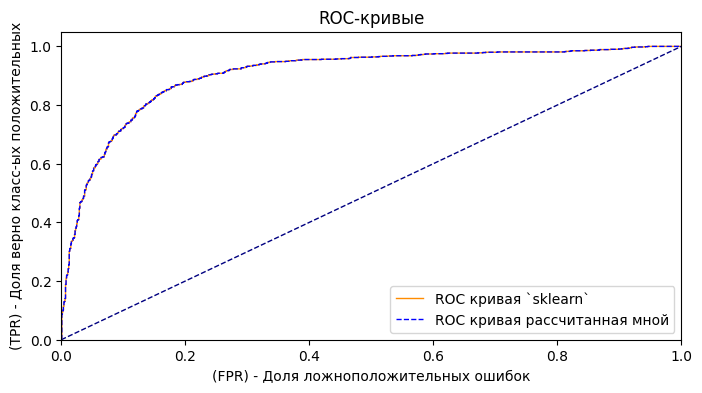

In [1060]:
# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ ROC-–∫—Ä–∏–≤—ã—Ö –Ω–∞ –æ–¥–Ω–æ–º –≥—Ä–∞—Ñ–∏–∫–µ
plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC –∫—Ä–∏–≤–∞—è `sklearn`')
plt.plot(FPR_my_calculate, TPR_my_calculate, color='blue', lw=1, linestyle='--', label='ROC –∫—Ä–∏–≤–∞—è —Ä–∞—Å—Å—á–∏—Ç–∞–Ω–Ω–∞—è –º–Ω–æ–π')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('(FPR) - –î–æ–ª—è –ª–æ–∂–Ω–æ–ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö –æ—à–∏–±–æ–∫')
plt.ylabel('(TPR) - –î–æ–ª—è –≤–µ—Ä–Ω–æ –∫–ª–∞—Å—Å-—ã—Ö –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö')
plt.title('ROC-–∫—Ä–∏–≤—ã–µ')
plt.legend(loc='lower right')
plt.show()

#### –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –≥—Ä–∞—Ñ–∏–∫ `Precision-Recall`, –∏—Å–ø–æ–ª—å–∑—É—è –º–µ—Ç—Ä–∏–∫–∏, –ø–æ—Å—á–∏—Ç–∞–Ω–Ω—ã—Ö –≤—Ä—É—á–Ω—É—é

In [1061]:
def show_precision_recall(recall, precision, title='Precision-Recall –∫—Ä–∏–≤–∞—è'):
    # –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞ Precision-Recall
    plt.figure(figsize=(8, 4))
    plt.plot(recall, precision, color='darkorange', lw=2)
    plt.xlabel('Recall (–ü–æ–ª–Ω–æ—Ç–∞)')
    plt.ylabel('Precision (–¢–æ—á–Ω–æ—Å—Ç—å)')
    plt.title(title)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.grid(True)
    plt.show()

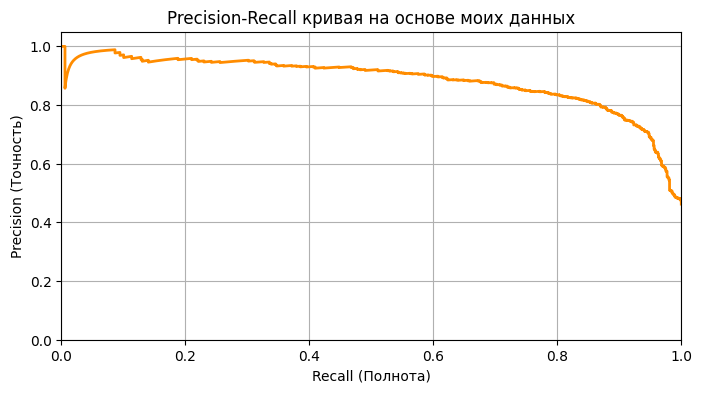

In [1062]:
# –í—ã—á–∏—Å–ª–µ–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏–π —Ç–æ—á–Ω–æ—Å—Ç–∏ –∏ –ø–æ–ª–Ω–æ—Ç—ã
recall, precision = recall_my_calculate, precision_my_calculate
show_precision_recall(recall, precision, title='Precision-Recall –∫—Ä–∏–≤–∞—è –Ω–∞ –æ—Å–Ω–æ–≤–µ –º–æ–∏—Ö –¥–∞–Ω–Ω—ã—Ö')

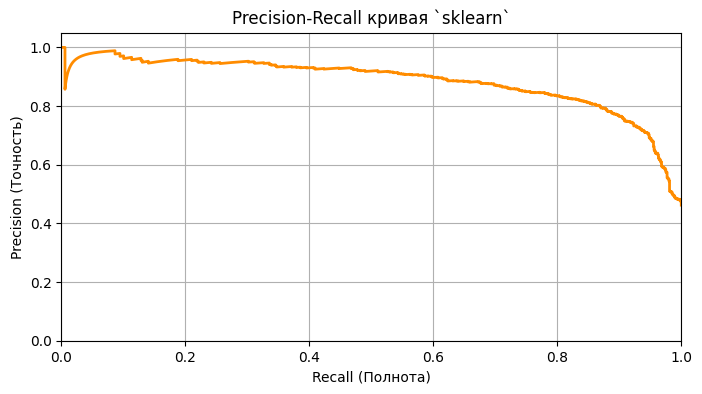

In [1063]:
from sklearn.metrics import precision_recall_curve

# –í—ã—á–∏—Å–ª–µ–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏–π —Ç–æ—á–Ω–æ—Å—Ç–∏ –∏ –ø–æ–ª–Ω–æ—Ç—ã
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

show_precision_recall(recall, precision, title='Precision-Recall –∫—Ä–∏–≤–∞—è `sklearn`')

In [1064]:
def calculate_roc_auc(fpr, tpr):
    """
    –†–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ—Ç ROC-AUC –º–µ—Ç—Ä–∏–∫—É –Ω–∞ –æ—Å–Ω–æ–≤–µ –∑–Ω–∞—á–µ–Ω–∏–π FPR –∏ TPR.

    –ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
    - fpr: –ú–∞—Å—Å–∏–≤ –∑–Ω–∞—á–µ–Ω–∏–π False Positive Rate (FPR).
    - tpr: –ú–∞—Å—Å–∏–≤ –∑–Ω–∞—á–µ–Ω–∏–π True Positive Rate (TPR).

    –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç:
    - roc_auc: –ó–Ω–∞—á–µ–Ω–∏–µ ROC-AUC –º–µ—Ç—Ä–∏–∫–∏.
    """
    # –ü—Ä–æ–≤–µ—Ä–∫–∞ –¥–ª–∏–Ω—ã FPR –∏ TPR
    if len(FPR_my_calculate) != len(TPR_my_calculate):
        print("–û—à–∏–±–∫–∞: –î–ª–∏–Ω—ã —Å–ø–∏—Å–∫–æ–≤ FPR –∏ TPR –Ω–µ —Å–æ–≤–ø–∞–¥–∞—é—Ç.")
    else:
        print("–î–ª–∏–Ω—ã —Å–ø–∏—Å–∫–æ–≤ FPR –∏ TPR —Å–æ–≤–ø–∞–¥–∞—é—Ç.")
    n = len(fpr)
    roc_auc = 0.0

    # –ü—Ä–æ–≤–µ—Ä–∫–∞ –¥–∏–∞–ø–∞–∑–æ–Ω–∞ –∑–Ω–∞—á–µ–Ω–∏–π FPR –∏ TPR
    if any(value < 0 or value > 1 for value in FPR_my_calculate) or any(value < 0 or value > 1 for value in TPR_my_calculate):
        print("–û—à–∏–±–∫–∞: –ó–Ω–∞—á–µ–Ω–∏—è FPR –∏ TPR –¥–æ–ª–∂–Ω—ã –Ω–∞—Ö–æ–¥–∏—Ç—å—Å—è –≤ –¥–∏–∞–ø–∞–∑–æ–Ω–µ –æ—Ç 0 –¥–æ 1.")
    else:
        print("–ó–Ω–∞—á–µ–Ω–∏—è FPR –∏ TPR –Ω–∞—Ö–æ–¥—è—Ç—Å—è –≤ –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ–º –¥–∏–∞–ø–∞–∑–æ–Ω–µ [0, 1].")

    for i in range(1, n):
        # –ò—Å–ø–æ–ª—å–∑—É–µ–º —Ç—Ä–∞–ø–µ—Ü–∏–µ–≤–∏–¥–Ω–æ–µ —á–∏—Å–ª–µ–Ω–Ω–æ–µ –∏–Ω—Ç–µ–≥—Ä–∏—Ä–æ–≤–∞–Ω–∏–µ
        roc_auc += (tpr[i] + tpr[i - 1]) * (fpr[i - 1] - fpr[i]) / 2

    return abs(roc_auc)

#### *–í—ã—á–∏—Å–ª–∏—Ç–µ –∑–Ω–∞—á–µ–Ω–∏–µ `ROC-AUC` –º–µ—Ç—Ä–∏–∫–∏, –∏—Å–ø–æ–ª—å–∑—É—è –º–µ—Ç—Ä–∏–∫–∏, –ø–æ—Å—á–∏—Ç–∞–Ω–Ω—ã–µ –≤—ã—à–µ

In [1065]:
roc_auc_my_calculate = calculate_roc_auc(FPR_my_calculate, TPR_my_calculate)

# –í—ã–≤–µ—Å—Ç–∏ –∑–Ω–∞—á–µ–Ω–∏–µ ROC-AUC
print(f"ROC-AUC (–º–æ—è —Ñ—É–Ω–∫—Ü–∏—è): {roc_auc_my_calculate:.2f}")

–î–ª–∏–Ω—ã —Å–ø–∏—Å–∫–æ–≤ FPR –∏ TPR —Å–æ–≤–ø–∞–¥–∞—é—Ç.
–ó–Ω–∞—á–µ–Ω–∏—è FPR –∏ TPR –Ω–∞—Ö–æ–¥—è—Ç—Å—è –≤ –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ–º –¥–∏–∞–ø–∞–∑–æ–Ω–µ [0, 1].
ROC-AUC (–º–æ—è —Ñ—É–Ω–∫—Ü–∏—è): 0.90


In [1066]:
from sklearn.metrics import auc

# –í—ã—á–∏—Å–ª–∏—Ç—å ROC-AUC –º–µ—Ç—Ä–∏–∫—É
roc_auc_my_calculate = auc(FPR_my_calculate, TPR_my_calculate)

# –í—ã–≤–µ—Å—Ç–∏ –∑–Ω–∞—á–µ–Ω–∏–µ ROC-AUC
print(f"ROC-AUC (sklearn): {roc_auc_my_calculate:.2f}")

ROC-AUC (sklearn): 0.90


### –í—ã–≤–æ–¥—ã
* `score` = `0.83` —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —Ö–æ—Ä–æ—à–µ–µ –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏;
* `0.84`= `TPR (True Positive Rate, Recall)`  –≠—Ç–æ –¥–æ–ª—è –≤–µ—Ä–Ω–æ —Ä–∞—Å–ø–æ–∑–Ω–∞–Ω–Ω—ã—Ö –∂–µ–Ω—â–∏–Ω –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –¥–∞–Ω–Ω—ã—Ö —ç—Ç–æ–≥–æ –∫–ª–∞—Å—Å–∞;
* `0.16` = `FPR (False Positive Rate)`: –¥–æ–ª—è –ª–æ–∂–Ω—ã—Ö —Ä–∞—Å–ø–æ–∑–Ω–∞–≤–∞–Ω–∏–π –∂–µ–Ω—â–∏–Ω.  –≠—Ç–æ –¥–æ–ª—è –ª–æ–∂–Ω—ã—Ö –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö –æ—à–∏–±–æ–∫ (–ª–æ–∂–Ω—ã—Ö –∂–µ–Ω—â–∏–Ω üôÇ), –∫–æ—Ç–æ—Ä—ã—Ö –º–æ–¥–µ–ª—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–ª–∞ –∫–∞–∫ –∂–µ–Ω—â–∏–Ω, –Ω–æ –æ–Ω–∏ –Ω–∞ —Å–∞–º–æ–º –¥–µ–ª–µ –±—ã–ª–∏ –º—É–∂—á–∏–Ω–∞–º–∏;
* `ROC` –∫—Ä–∏–≤–∞—è –ø–æ—Å—á–∏—Ç–∞–Ω–Ω–∞—è –º–Ω–æ–π –∏ –≥–æ—Ç–æ–≤–æ–π —Ñ—É–Ω–∫—Ü–∏–µ–π –∏–∑ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ —Å–æ–≤–ø–∞–¥–∞–µ—Ç, —á—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ—Å—Ç–∏ —Ä–∞—Å—á–µ—Ç–∞, –∞ —Ç–∞–∫ –∂–µ –≤—ã–≥–ª—è–¥–∏—Ç –Ω–µ –ø–ª–æ—Ö–æ (–ø–ª–æ—â–∞–¥—å –ø–æ–¥ –Ω–µ–π –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–∞ –±–æ–ª—å—à–∞—è), —á—Ç–æ —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤—É–µ—Ç –æ –∫–∞—á–µ—Å—Ç–≤–µ –º–æ–¥–µ–ª–∏, –∏–¥–µ–∞–ª—å–Ω–∞—è –∫—Ä–∏–≤–∞—è —Å—Ç—Ä–µ–º–∏—Ç—å—Å—è –∫ –ª–µ–≤–æ–º—É –≤–µ—Ä—Ö–Ω–µ–º—É —É–≥–ª—É;
* `Precision-Recall` –≥—Ä–∞—Ñ–∏–∫–∏ —Å–æ–≤–ø–∞–¥–∞—é—Ç –∏ –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç –≤–∞–∂–Ω—ã–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–∏ –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏ (–æ—Ö–≤–∞—Ç –∏ —Ç–æ—á–Ω–æ—Å—Ç—å);
* `ROC-AUC` (–º–æ—è —Ñ—É–Ω–∫—Ü–∏—è): `0.90` –≥–æ–≤–æ—Ä–∏—Ç –æ —Ç–æ–º, —á—Ç–æ –º–æ–¥–µ–ª—å –∏–º–µ–µ—Ç —Ö–æ—Ä–æ—à—É—é —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å —Ä–∞–∑–ª–∏—á–∞—Ç—å –∫–ª–∞—Å—Å—ã;
* `ROC-AUC` `sklearn`: `0.90` –ó–Ω–∞—á–µ–Ω–∏–µ —Å–æ–≤–ø–∞–¥–∞–µ—Ç —Å –º–æ–µ–π —Ñ—É–Ω–∫—Ü–∏–µ–π, —á—Ç–æ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ—Å—Ç—å —Ä–∞—Å—á–µ—Ç–æ–≤.